In [1]:
import pandas as pd

In [2]:
complaints_df = pd.read_csv("../data/complaints.csv")
complaints_df

,Consumer complaint narrative,Issue
0,My name is XXXX XXXX this complaint is not mad...,Incorrect information on your report
1,I searched on XXXX for XXXXXXXX XXXX and was ...,Fraud or scam
2,I have a particular account that is stating th...,Incorrect information on your report
3,I have not supplied proof under the doctrine o...,Attempts to collect debt not owed
4,Hello i'm writing regarding account on my cred...,Incorrect information on your report
...,...,...
353427,Collections account I have no knowledge of,Attempts to collect debt not owed
353428,"Dear CFPB Team, The reason for my complaint is...",Attempts to collect debt not owed
353429,FRCA violations : Failing to Follow Debt Dispu...,Attempts to collect debt not owed
353430,"My Father, a XXXX XXXX acquired an HECM rever...",Struggling to pay mortgage


In [3]:
issue_counts = complaints_df["Issue"].value_counts()
print(issue_counts)

Incorrect information on your report    229305
Attempts to collect debt not owed        73163
Communication tactics                    21243
Struggling to pay mortgage               17374
Fraud or scam                            12347
Name: Issue, dtype: int64


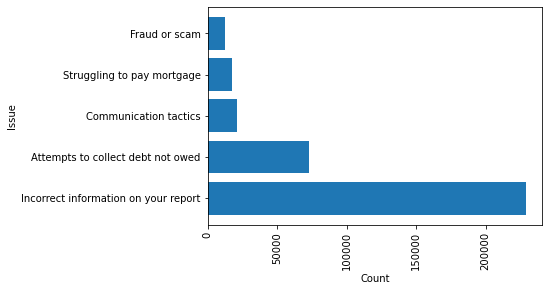

In [4]:
import matplotlib.pyplot as plt

plt.barh(issue_counts.index, issue_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Count")
plt.ylabel("Issue")
plt.show()

In [6]:
avg_length = complaints_df['Consumer complaint narrative'].str.len().mean()
print(avg_length)

1029.6670080807623


In [9]:
avg_length_by_classification = complaints_df.groupby('Issue')['Consumer complaint narrative'].apply(lambda x: x.str.len().mean())
print("The average length of complaint grouped by classification is:\n", avg_length_by_classification)

The average length of complaint grouped by classification is:
 Issue
Attempts to collect debt not owed       1000.366401
Communication tactics                    751.250294
Fraud or scam                           1360.773953
Incorrect information on your report     982.515222
Struggling to pay mortgage              1880.483711
Name: Consumer complaint narrative, dtype: float64


In [8]:
word_count = complaints_df['Consumer complaint narrative'].str.split().apply(len).sum()
char_count = complaints_df['Consumer complaint narrative'].str.len().sum()
print("The total word count of complaints is:", word_count)
print("The total character count of complaints is:", char_count)

The total word count of complaints is: 64920688
The total character count of complaints is: 363917270


In [10]:
from nltk import ngrams
from collections import Counter

# Define a function to get n-grams from text
def get_ngrams(text, n):
    n_grams = ngrams(text.split(), n)
    return [' '.join(grams) for grams in n_grams]

# Define a function to get the most common n-grams for each group
def get_most_common_ngrams(df, group_col, text_col, n, num_common):
    # Create a dictionary to hold the n-grams for each group
    ngrams_dict = {}
    
    # Group the dataframe by the group column
    groups = df.groupby(group_col)
    
    # Iterate through each group
    for name, group in groups:
        # Concatenate the text in the text column for the group
        text = ' '.join(group[text_col].tolist())
        
        # Get the n-grams from the text
        ngrams_list = get_ngrams(text, n)
        
        # Count the n-grams and get the most common ones
        ngrams_count = Counter(ngrams_list)
        top_ngrams = ngrams_count.most_common(num_common)
        
        # Add the most common n-grams to the dictionary for the group
        ngrams_dict[name] = top_ngrams
    
    return ngrams_dict

# Get the most common words for each issue
most_common_words = get_most_common_ngrams(complaints_df, 'Issue', 'Consumer complaint narrative', 1, 10)
print("Most common words for each issue:")
print(most_common_words)

# Get the most common bigrams for each issue
most_common_bigrams = get_most_common_ngrams(complaints_df, 'Issue', 'Consumer complaint narrative', 2, 10)
print("\nMost common bigrams for each issue:")
print(most_common_bigrams)

# Get the most common trigrams for each issue
most_common_trigrams = get_most_common_ngrams(complaints_df, 'Issue', 'Consumer complaint narrative', 3, 10)
print("\nMost common trigrams for each issue:")
print(most_common_trigrams)

Most common words for each issue:
{'Attempts to collect debt not owed': [('XXXX', 516571), ('the', 466917), ('to', 409573), ('I', 403441), ('and', 335221), ('of', 271281), ('a', 254812), ('my', 214386), ('that', 192886), ('this', 153802)], 'Communication tactics': [('I', 118476), ('to', 105279), ('XXXX', 93793), ('the', 90543), ('and', 87052), ('a', 61821), ('my', 48505), ('that', 41346), ('me', 38464), ('of', 37731)], 'Fraud or scam': [('XXXX', 131085), ('the', 122350), ('to', 110999), ('I', 108948), ('and', 86594), ('a', 59262), ('my', 55904), ('was', 48592), ('of', 44915), ('that', 44463)], 'Incorrect information on your report': [('XXXX', 3605063), ('the', 1260969), ('to', 1074321), ('I', 992173), ('and', 898131), ('my', 766874), ('of', 689808), ('a', 658365), ('that', 486498), ('credit', 441121)], 'Struggling to pay mortgage': [('the', 233402), ('to', 209312), ('XXXX', 182628), ('I', 181900), ('and', 160250), ('a', 112926), ('of', 98846), ('my', 92494), ('that', 83695), ('was', 81

In [12]:
import nltk

# Create an empty dataframe to store the results
results_df = pd.DataFrame(columns=['Issue', 'Words', 'Frequency'])

# Loop over each issue
for issue in complaints_df['Issue'].unique():
    # Filter the data to include only the current issue
    issue_df = complaints_df[complaints_df['Issue'] == issue]
    
    # Get the most common words
    words = nltk.FreqDist(issue_df['Consumer complaint narrative'].str.cat(sep=' ').split())
    top_words = pd.DataFrame(words.most_common(5), columns=['Words', 'Frequency'])
    top_words['Issue'] = issue
    results_df = results_df.append(top_words, ignore_index=True)
    
    # Get the most common bigrams
    bigrams = nltk.FreqDist(list(nltk.bigrams(issue_df['Consumer complaint narrative'].str.cat(sep=' ').split())))
    top_bigrams = pd.DataFrame(bigrams.most_common(5), columns=['Words', 'Frequency'])
    top_bigrams['Words'] = top_bigrams['Words'].apply(lambda x: ' '.join(x))
    top_bigrams['Issue'] = issue
    results_df = results_df.append(top_bigrams, ignore_index=True)
    
    # Get the most common trigrams
    trigrams = nltk.FreqDist(list(nltk.trigrams(issue_df['Consumer complaint narrative'].str.cat(sep=' ').split())))
    top_trigrams = pd.DataFrame(trigrams.most_common(5), columns=['Words', 'Frequency'])
    top_trigrams['Words'] = top_trigrams['Words'].apply(lambda x: ' '.join(x))
    top_trigrams['Issue'] = issue
    results_df = results_df.append(top_trigrams, ignore_index=True)

# Print the top 5 most common words, bigrams, and trigrams for each issue
print(results_df)


C:\Users\garre\AppData\Local\Temp\ipykernel_1952\4043605894.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(top_words, ignore_index=True)
C:\Users\garre\AppData\Local\Temp\ipykernel_1952\4043605894.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(top_bigrams, ignore_index=True)
C:\Users\garre\AppData\Local\Temp\ipykernel_1952\4043605894.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(top_trigrams, ignore_index=True)
C:\Users\garre\AppData\Local\Temp\ipykernel_1952\4043605894.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resu

                                   Issue            Words Frequency
0   Incorrect information on your report             XXXX   3605063
1   Incorrect information on your report              the   1260969
2   Incorrect information on your report               to   1074321
3   Incorrect information on your report                I    992173
4   Incorrect information on your report              and    898131
..                                   ...              ...       ...
70            Struggling to pay mortgage   XXXX XXXX XXXX     28685
71            Struggling to pay mortgage       I was told      4136
72            Struggling to pay mortgage      I have been      3621
73            Struggling to pay mortgage  XXXX XXXX XXXX,      3614
74            Struggling to pay mortgage    XXXX XXXX and      3435

[75 rows x 3 columns]


C:\Users\garre\AppData\Local\Temp\ipykernel_1952\4043605894.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(top_trigrams, ignore_index=True)


In [14]:
pd.set_option("display.max_rows", None)
results_df

,Issue,Words,Frequency
0,Incorrect information on your report,XXXX,3605063
1,Incorrect information on your report,the,1260969
2,Incorrect information on your report,to,1074321
3,Incorrect information on your report,I,992173
4,Incorrect information on your report,and,898131
5,Incorrect information on your report,XXXX XXXX,2272622
6,Incorrect information on your report,my credit,223989
7,Incorrect information on your report,I have,208068
8,Incorrect information on your report,on my,151722
9,Incorrect information on your report,of the,150954


In [15]:
import nltk

# Download the required NLTK resources
nltk.download()

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Define the stop words and lemmatizer
stop_words = stopwords.words("english")
lemmatizer = WordNetLemmatizer()

# Define a function to perform the text preprocessing
def preprocess_text(text):
    # Convert the text to lowercase
    text = text.lower()
    
    # Remove stop words
    text = " ".join([word for word in text.split() if word not in stop_words])
    
    # Lemmatize the words
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])
    
    return text

# Apply the text preprocessing to the consumer complaint narrative column
complaints_df["Consumer complaint narrative"] = complaints_df["Consumer complaint narrative"].apply(preprocess_text)


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
